In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

from Server_Cleaning.modules.Assignment_datasets import *

path = "./"

In [109]:
# Create the DataFrame
df = pd.DataFrame({'num_legs': [2, 4, 3], 'num_wings': [2, 0, 5], 'num_tails': [0, 1, 1]},
                  index=['falcon', 'dog', 'lizard'])

# Define the dropdown options
dropdown_options = ['falcon', 'dog', 'lizard']

# Create the dropdown widget
dropdown = widgets.Dropdown(options=dropdown_options)

# Define the plotting function
def plot(animal):
    """Plots the bar chart for the selected animal."""
    plt.figure(figsize=(8, 6))
    df.loc[animal].plot(kind='bar')
    plt.title(f"Attributes of {animal}")
    plt.ylabel("Value")
    plt.show()

# Connect the dropdown to the plotting function
widgets.interact(plot, animal=dropdown)

interactive(children=(Dropdown(description='animal', options=('falcon', 'dog', 'lizard'), value='falcon'), Out…

<function __main__.plot(animal)>

In [110]:
cg_g = clean_club_games(get_club_games(path), path)
club_games = cg_g[0]
games = cg_g[1]
print("doubles per match: ", ((club_games.drop_duplicates("game_id").shape[0] * 2) == club_games.shape[0]))
top_clubs_g = club_games.value_counts('club_id').reset_index().head(10)
clubs = clean_clubs(get_clubs(path))
top_10_clubs = clubs.query('club_id.isin(@top_clubs_g.club_id)', engine='python')
top_clubs_g

doubles per match:  True


,club_id,count
0,131,610
1,418,597
2,506,591
3,281,587
4,985,575
5,13,573
6,368,569
7,631,559
8,11,552
9,6195,551


 `top_club_g` sono i 10 clubs con una maggiore mole di dati di partite a nostra disposizione

# --------------------------------------------------------------------------------
# Players

In [111]:
players = clean_players(get_players(path))
player_val = clean_player_valuations(get_player_valuations(path))
appear = clean_appearances(get_appearances(path), games, path)

In [112]:
print(players.columns)
print(player_val.columns)
appear.columns

Index(['player_id', 'last_name', 'player_name', 'last_season',
       'current_club_id', 'country_of_birth', 'city_of_birth',
       'country_of_citizenship', 'date_of_birth', 'sub_position', 'position',
       'foot', 'height_in_cm', 'value_eur', 'top_value_eur',
       'contract_expiration_date', 'agent_name', 'image_url'],
      dtype='object')
Index(['player_id', 'last_season', 'date', 'date_week', 'market_value_eur',
       'current_club_id', 'current_dom_competition_code'],
      dtype='object')


Index(['appearance_id', 'game_id', 'player_id', 'player_club_id',
       'player_current_club_id', 'game_date', 'player_name', 'competition_id',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object')

In [113]:
players = players[players['last_season'] > 2021]
player_val = player_val[player_val['last_season'] > 2021]
appear = appear[appear['game_date'] > pd.to_datetime("2021-12-31")]

In [114]:
appear.head()

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,game_date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
1244088,3592301_111455,3592301,111455,11,15,2022-01-01,Granit Xhaka,GB1,1,False,0,0,90
1244089,3592301_134425,3592301,134425,281,631,2022-01-01,Raheem Sterling,GB1,0,False,0,0,90
1244090,3592301_160438,3592301,160438,11,11,2022-01-01,Mohamed Elneny,GB1,0,False,0,0,6
1244091,3592301_171424,3592301,171424,281,281,2022-01-01,Riyad Mahrez,GB1,0,False,1,0,90
1244092,3592301_176553,3592301,176553,281,281,2022-01-01,Aymeric Laporte,GB1,0,False,0,0,90


In [115]:
player_val.sort_values(by='date')
top_player_vals = player_val.drop_duplicates('player_id', keep='last').sort_values(by='market_value_eur', ascending=False).head(10)
top_player_vals

,player_id,last_season,date,date_week,market_value_eur,current_club_id,current_dom_competition_code
436380,418560,2023,2023-06-20,2023-06-19,180000000,281,GB1
439318,342229,2023,2023-06-27,2023-06-26,180000000,583,FR1
433681,371998,2023,2023-06-13,2023-06-12,150000000,418,ES1
436396,433177,2023,2023-06-20,2023-06-19,120000000,11,GB1
437531,581678,2023,2023-06-22,2023-06-19,120000000,418,ES1
434963,401923,2023,2023-06-15,2023-06-12,120000000,6195,IT1
436370,406635,2023,2023-06-20,2023-06-19,110000000,281,GB1
437530,580195,2023,2023-06-22,2023-06-19,110000000,27,L1
433710,412363,2023,2023-06-13,2023-06-12,100000000,418,ES1
433680,369081,2023,2023-06-13,2023-06-12,100000000,418,ES1


In [116]:
top_10_players = players.loc[players['player_id'].isin(top_player_vals['player_id'])]
top_10_players

,player_id,last_name,player_name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,value_eur,top_value_eur,contract_expiration_date,agent_name,image_url
4606,342229,Mbappé,Kylian Mbappé,2023,583,France,Paris,France,1998-12-20,Centre-Forward,Attack,right,178,180000000,200000000,2024-06-30,<NA>,https://img.a.transfermarkt.technology/portrai...
4968,580195,Musiala,Jamal Musiala,2023,27,Germany,Stuttgart,Germany,2003-02-26,Attacking Midfield,Midfield,right,184,110000000,110000000,2026-06-30,11WINS,https://img.a.transfermarkt.technology/portrai...
6616,412363,Rodrygo,Rodrygo,2023,418,Brazil,Osasco,Brazil,2001-01-09,Right Winger,Attack,right,174,100000000,100000000,2025-06-30,Un1que Football,https://img.a.transfermarkt.technology/portrai...
10293,371998,Vinicius Junior,Vinicius Junior,2023,418,Brazil,São Gonçalo,Brazil,2000-07-12,Left Winger,Attack,right,176,150000000,150000000,NaT,TFM Agency,https://img.a.transfermarkt.technology/portrai...
12231,406635,Foden,Phil Foden,2023,281,England,Stockport,England,2000-05-28,Left Winger,Attack,left,171,110000000,110000000,2027-06-30,<NA>,https://img.a.transfermarkt.technology/portrai...
12249,418560,Haaland,Erling Haaland,2023,281,England,Leeds,Norway,2000-07-21,Centre-Forward,Attack,left,195,180000000,180000000,2027-06-30,Rafaela Pimenta,https://img.a.transfermarkt.technology/portrai...
23059,369081,Valverde,Federico Valverde,2023,418,Uruguay,Montevideo,Uruguay,1998-07-22,Central Midfield,Midfield,right,182,100000000,100000000,2027-06-30,Wasserman,https://img.a.transfermarkt.technology/portrai...
23354,581678,Bellingham,Jude Bellingham,2023,418,England,Stourbridge,England,2003-06-29,Central Midfield,Midfield,right,186,150000000,150000000,2029-06-30,<NA>,https://img.a.transfermarkt.technology/portrai...
28817,433177,Saka,Bukayo Saka,2023,11,England,London,England,2001-09-05,Right Winger,Attack,left,178,120000000,120000000,2027-06-30,<NA>,https://img.a.transfermarkt.technology/portrai...
29959,401923,Osimhen,Victor Osimhen,2023,6195,Nigeria,Lagos,Nigeria,1998-12-29,Centre-Forward,Attack,right,186,120000000,120000000,2025-06-30,Roberto Calenda,https://img.a.transfermarkt.technology/portrai...


In [117]:
df1 = player_val.drop_duplicates('player_id', keep='last').sort_values(by='market_value_eur', ascending=False).head(50)
info_about_top_payed = players.loc[players['player_id'].isin(df1['player_id'])]
info_about_top_payed = pd.merge(info_about_top_payed, df1[['player_id', 'market_value_eur', 'date_week', 'current_dom_competition_code']], on='player_id', how='left')
info_about_top_payed = info_about_top_payed.drop(columns=['image_url'])
info_about_top_payed

,player_id,last_name,player_name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,value_eur,top_value_eur,contract_expiration_date,agent_name,market_value_eur,date_week,current_dom_competition_code
0,192565,Sané,Leroy Sané,2023,27,Germany,Essen,Germany,1996-01-11,Right Winger,Attack,left,183,65000000,100000000,2025-06-30,LIAN Sports Group,65000000,2023-06-19,L1
1,424204,Davies,Alphonso Davies,2023,27,Ghana,Buduburam,Canada,2000-11-02,Left-Back,Defender,left,183,70000000,80000000,2025-06-30,ATG Sports,70000000,2023-06-19,L1
2,520624,Guimarães,Bruno Guimarães,2023,762,Brazil,Rio de Janeiro,Brazil,1997-11-16,Defensive Midfield,Midfield,right,182,85000000,85000000,2028-06-30,Bertolucci Sports,70000000,2023-06-19,GB1
3,314353,Alexander-Arnold,Trent Alexander-Arnold,2023,31,England,Liverpool,England,1998-10-07,Right-Back,Defender,right,180,65000000,110000000,2025-06-30,PLG,65000000,2023-06-19,GB1
4,357164,Leão,Rafael Leão,2023,5,Portugal,Almada,Portugal,1999-06-10,Left Winger,Attack,right,188,90000000,90000000,2028-06-30,<NA>,90000000,2023-06-12,IT1
5,132098,Kane,Harry Kane,2023,27,England,London,England,1993-07-28,Centre-Forward,Attack,right,188,90000000,150000000,2027-06-30,CK66,90000000,2023-06-19,L1
6,316264,Ødegaard,Martin Ødegaard,2023,11,Norway,Drammen,Norway,1998-12-17,Attacking Midfield,Midfield,left,178,90000000,90000000,2028-06-30,Nordic Sky,90000000,2023-06-19,GB1
7,342229,Mbappé,Kylian Mbappé,2023,583,France,Paris,France,1998-12-20,Centre-Forward,Attack,right,178,180000000,200000000,2024-06-30,<NA>,180000000,2023-06-26,FR1
8,406625,Martínez,Lautaro Martínez,2023,46,Argentina,Bahía Blanca,Argentina,1997-08-22,Centre-Forward,Attack,right,174,100000000,100000000,2026-06-30,Footfeel ISM,85000000,2023-06-12,IT1
9,487969,Kolo Muani,Randal Kolo Muani,2023,583,France,Bondy,France,1998-12-05,Centre-Forward,Attack,right,187,80000000,80000000,2028-06-30,<NA>,80000000,2023-06-19,FR1


In [118]:
poor_players = players[~players['player_id'].isin(info_about_top_payed['player_id'])]
print(players.shape)
poor_players

(10185, 18)


,player_id,last_name,player_name,last_season,current_club_id,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,value_eur,top_value_eur,contract_expiration_date,agent_name,image_url
72,18922,Benzema,Karim Benzema,2022,418,France,Lyon,France,1987-12-19,Centre-Forward,Attack,right,185,25000000,60000000,2026-06-30,<NA>,https://img.a.transfermarkt.technology/portrai...
89,22860,Hansen,Jesper Hansen,2023,678,Denmark,Slangerup,Denmark,1985-03-31,Goalkeeper,Goalkeeper,right,188,200000,1000000,2024-06-30,Boutique Transfers,https://img.a.transfermarkt.technology/portrai...
118,30321,Trejo,Óscar Trejo,2023,367,Argentina,Santiago del Estero,Argentina,1988-04-26,Attacking Midfield,Midfield,right,180,2500000,4000000,2024-06-30,Eleven Talent Group,https://img.a.transfermarkt.technology/portrai...
133,33925,Moulin,Jessy Moulin,2022,1095,France,Valence,France,1986-01-13,Goalkeeper,Goalkeeper,right,184,200000,1000000,NaT,<NA>,https://img.a.transfermarkt.technology/portrai...
136,35099,Fletcher,Steven Fletcher,2022,1519,England,Shrewsbury,Scotland,1987-03-26,Centre-Forward,Attack,left,185,200000,15000000,NaT,<NA>,https://img.a.transfermarkt.technology/portrai...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30294,284732,Bensebaini,Ramy Bensebaini,2023,16,Algeria,Constantine,Algeria,1995-04-16,Left-Back,Defender,left,187,20000000,22000000,2027-06-30,<NA>,https://img.a.transfermarkt.technology/portrai...
30297,371851,Bijol,Jaka Bijol,2023,410,Slovenia,Vuzenica,Slovenia,1999-02-05,Centre-Back,Defender,right,190,10000000,10000000,2027-06-30,MSC GROUP,https://img.a.transfermarkt.technology/portrai...
30299,586756,Ebosele,Festy Ebosele,2023,410,Ireland,"Enniscorthy, Wexford",Ireland,2002-08-02,Right Midfield,Midfield,right,180,4500000,4500000,2027-06-30,The Kulture Group,https://img.a.transfermarkt.technology/portrai...
30300,704692,Cocetta,Nicolò Cocetta,2022,410,Italy,San Daniele del Friuli,Italy,2003-12-19,Centre-Back,Defender,<NA>,-1,75000,75000,2023-06-30,<NA>,https://img.a.transfermarkt.technology/portrai...


In [119]:
players.value_counts('height_in_cm').reset_index()

,height_in_cm,count
0,-1,663
1,180,626
2,185,617
3,183,516
4,178,512
5,188,482
6,187,482
7,184,469
8,186,457
9,175,443


In [120]:
countries = info_about_top_payed.groupby('country_of_citizenship').agg(count=pd.NamedAgg('country_of_citizenship', 'count')).reset_index()
countries #no good

,country_of_citizenship,count
0,Argentina,3
1,Belgium,1
2,Brazil,6
3,Canada,1
4,Colombia,1
5,Croatia,1
6,Ecuador,1
7,England,9
8,France,5
9,Georgia,1


In [121]:
top_10_clubs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 64 to 392
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   club_id                 10 non-null     int64  
 1   club_name               10 non-null     string 
 2   local_competition_code  10 non-null     string 
 3   squad_size              10 non-null     int64  
 4   average_age             10 non-null     float64
 5   foreigners_number       10 non-null     int64  
 6   foreigners_percentage   10 non-null     int32  
 7   national_team_players   10 non-null     int64  
 8   stadium_name            10 non-null     string 
 9   stadium_seats           10 non-null     int64  
 10  net_transfer_record     10 non-null     int32  
 11  last_season             10 non-null     int64  
dtypes: float64(1), int32(2), int64(6), string(3)
memory usage: 960.0 bytes


# goals by minutes

In [122]:
game_events = pd.read_csv("./Assignment_Data_2023-2024/game_events.csv")
game_events = game_events[game_events['type'] == "Goals"]
game_events['date'] = game_events['date'].astype('datetime64[ns]')
game_events = game_events[game_events['date'] > pd.to_datetime("2021-12-31")]
top_payed_game_events = game_events[game_events['player_id'].isin(info_about_top_payed['player_id'])]

In [123]:
game_events = game_events.drop(columns=['date', 'game_event_id', 'game_id', 'type', 'club_id', 'description', 'player_in_id', 'player_assist_id'])
top_payed_game_events

,game_event_id,date,game_id,minute,type,club_id,player_id,description,player_in_id,player_assist_id
494470,07660917c44a644ffd5e95a2e36e8d08,2022-01-08,3588401,58,Goals,23826,344381,", Left-footed shot, 8. Goal of the Season",NaN,NaN
494483,348195a7c9590564b2de543054df91a2,2022-01-08,3588402,87,Goals,16,581678,", Header, 3. Goal of the Season",NaN,NaN
494562,5dcbf2fe4ebff97a4f5a054bf8a12324,2022-01-14,3588418,45,Goals,16,418560,", Left-footed shot, 14. Goal of the Season",NaN,NaN
494563,b69b6037bd88e0bdf4dc8e74672b76b6,2022-01-14,3588418,75,Goals,16,418560,", Left-footed shot, 15. Goal of the Season",NaN,NaN
494599,54c6b466e1c7c944800223776da0e852,2022-01-15,3588422,70,Goals,23826,344381,", Left-footed shot, 9. Goal of the Season",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
659519,acf74159dec1e4868da69bb4cc603569,2023-10-26,4172145,4,Goals,15,598577,", Left-footed shot, 2. Tournament Goal",NaN,NaN
659536,b28bf09dbae5750e6f1af448bc1ef6d2,2023-09-21,4172147,10,Goals,15,598577,", Right-footed shot, 1. Tournament Goal Assist...",NaN,656681.0
659977,3a5f00b236f4a4e35e7714a0ed670a9a,2023-09-19,4174054,54,Goals,131,646740,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,38253.0
661630,91de34f06612150e4db40deec018d9d1,2023-09-27,4188454,53,Goals,762,349066,", Left-footed shot, 1. Tournament Goal Assist:...",NaN,333241.0


goals by minutes achieved by every player since 2022

In [124]:
game_events.set_index('player_id')
game_events.value_counts('player_id')
last_players = players[players['last_season']>=2022]
last_players_game_events = game_events[game_events['player_id'].isin(last_players['player_id'])]
last_players_game_events.value_counts('minute').sort_values(ascending=False)
last_players_game_events.value_counts('player_id')

player_id
418560     81
342229     74
132098     70
38253      61
406625     57
           ..
513031      1
512994      1
512993      1
257814      1
1166093     1
Name: count, Length: 5098, dtype: int64

In [125]:
appearances = pd.read_csv("./Assignment_Data_2023-2024/appearances.csv")
appearances

,appearance_id,game_id,player_id,player_club_id,player_current_club_id,date,player_name,competition_id,yellow_cards,red_cards,goals,assists,minutes_played
0,2231978_38004,2231978,38004,853,235,2012-07-03,Aurélien Joachim,CLQ,0,0,2,0,90
1,2233748_79232,2233748,79232,8841,2698,2012-07-05,Ruslan Abyshov,ELQ,0,0,0,0,90
2,2234413_42792,2234413,42792,6251,465,2012-07-05,Sander Puri,ELQ,0,0,0,0,45
3,2234418_73333,2234418,73333,1274,6646,2012-07-05,Vegar Hedenstad,ELQ,0,0,0,0,90
4,2234421_122011,2234421,122011,195,3008,2012-07-05,Markus Henriksen,ELQ,0,0,0,1,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507346,4172154_659813,4172154,659813,15,15,2023-11-30,Piero Hincapié,EL,0,0,0,0,90
1507347,4172154_696027,4172154,696027,15,15,2023-11-30,Ayman Aourir,EL,0,0,0,0,2
1507348,4172154_7161,4172154,7161,15,15,2023-11-30,Jonas Hofmann,EL,0,0,0,0,10
1507349,4172154_743395,4172154,743395,15,15,2023-11-30,Noah Mbamba,EL,0,0,0,0,45


Heatmap: y=giocatore x=minuto z=numero goal una per club del campionato(?)

In [126]:
target_clubs = clubs[['club_id', 'club_name']]
target_player = players[players['current_club_id'].isin(target_clubs['club_id'])]
target_player.value_counts('current_club_id')

current_club_id
3999     55
868      54
865      52
124      51
703      51
         ..
443      24
39097    23
1108     23
49364    20
44       19
Name: count, Length: 274, dtype: int64

In [127]:
test_players = last_players_game_events[last_players_game_events['player_id'].isin([418560,342229,132098,38253])]
test_players.value_counts('player_id')
test_players = test_players.set_index('player_id')
test_players.value_counts() 

test_players.loc[418560].value_counts().sort_index()

minute
3         1
4         1
6         1
7         1
10        1
12        1
13        1
14        1
16        1
18        1
19        1
20        1
22        2
23        2
24        2
25        2
26        1
27        1
29        1
30        1
32        2
34        1
35        1
36        2
37        1
38        2
39        1
40        1
43        1
45        3
47        1
49        1
50        2
51        2
53        2
54        3
57        2
58        2
59        1
60        1
62        2
63        1
64        2
65        2
67        2
68        2
70        3
75        1
76        1
78        1
81        1
82        1
84        1
86        2
90        3
Name: count, dtype: int64

In [128]:
# Define the dropdown options
dropdown_options = [418560, 342229, 132098, 38253]

# Create the dropdown widget
dropdown = widgets.Dropdown(options=dropdown_options)

def plot(player):
    """Plots the bar chart for the selected animal."""
    plt.figure(figsize=(12, 6))
    test_players.loc[player].value_counts().sort_index().plot(kind='bar')
    plt.title(f"Attributes of {player}")
    plt.ylabel("Value")
    plt.show()


# Connect the dropdown to the plotting function
widgets.interact(plot, player=dropdown)


interactive(children=(Dropdown(description='player', options=(418560, 342229, 132098, 38253), value=418560), O…

<function __main__.plot(player)>

In [129]:
# FUNCTION & DF DEFINITIONS
restricted_top_payed_game_events = top_payed_game_events[["player_id", "minute"]].copy()
restricted_top_payed_game_events = \
pd.merge(restricted_top_payed_game_events, players[["player_id", 'player_name']], on='player_id')[
    ['player_name', 'minute']]

# creating minute range!!!
#bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]  # 90 is for the goals occurred after the 90th minute
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]  # 90 is for the goals occurred after the 90th minute
restricted_top_payed_game_events.loc[:, 'minute_range'] = pd.cut(restricted_top_payed_game_events['minute'], bins=bins)

restricted_top_payed_game_events = restricted_top_payed_game_events.drop(columns=['minute']).set_index('player_name')


In [130]:
dropdown = widgets.Dropdown(
    options=restricted_top_payed_game_events.index.unique()
)


def update_plot(name):
    plt.figure(figsize=(8, 6))
    restricted_top_payed_game_events.loc[name].value_counts().sort_index().plot(kind='bar')
    plt.xlabel('Minute Range')
    plt.ylabel('Number of Goals')
    plt.title('Goals Scored by Minute Range')
    plt.show()


widgets.interact(update_plot, name=dropdown)


interactive(children=(Dropdown(description='name', options=('Christopher Nkunku', 'Jude Bellingham', 'Erling H…

<function __main__.update_plot(name)>

In [131]:
test_players.loc[418560].value_counts().sort_index().reset_index()
restricted_top_payed_game_events.loc['Harry Kane'].value_counts().sort_index()

minute_range
(0, 10]          6
(10, 20]         7
(20, 30]         6
(30, 40]         9
(40, 50]         7
(50, 60]        10
(60, 70]         9
(70, 80]         6
(80, 90]        10
Name: count, dtype: int64

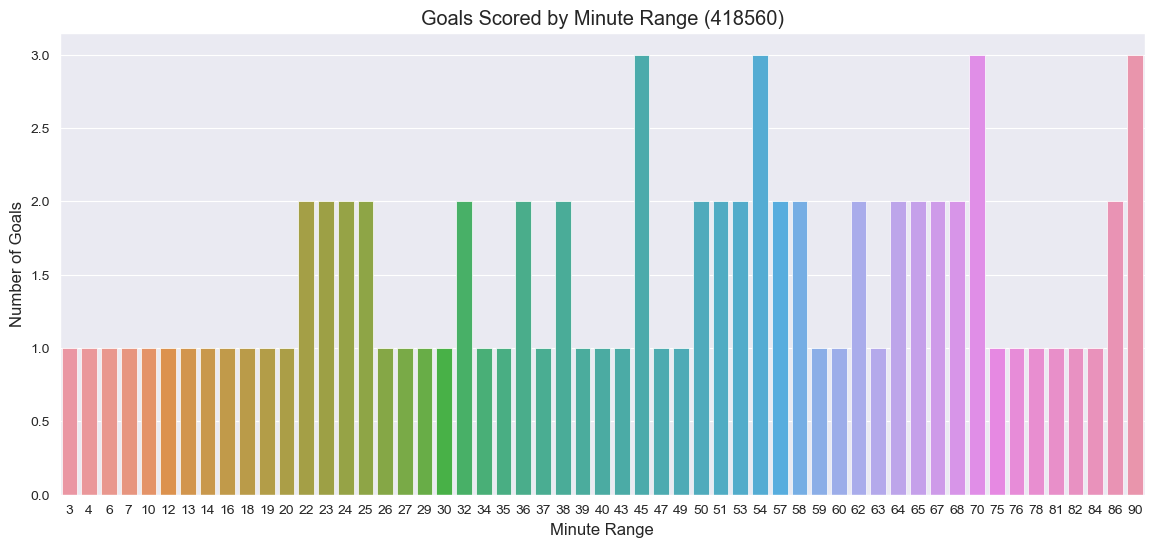

In [132]:
def test_plot(player):
    """Plots the goal counts by minute range for the specified team.

    Args:
        player (str): Name of the team to plot.
    """
    plt.figure(figsize=(14, 6))
    
    # Get the goal counts for the specified team
    # Create a bar plot using Seaborn
    ax = sns.barplot(data=test_players.loc[player].value_counts().sort_index().reset_index(), x='minute', y='count')

    # Set labels and title
    plt.xlabel('Minute Range')
    plt.ylabel('Number of Goals')
    plt.title(f'Goals Scored by Minute Range ({player})')

    # Display the plot
    plt.show(ax)
    
# Create the heatmap using Seaborn
#sns.heatmap(df, annot=True, cmap='magma')
    
test_plot(418560)

In [135]:
import seaborn as sns

dropdown = widgets.Dropdown(
    options=restricted_top_payed_game_events.index.unique()
)

def update_plot(name):
    """Plots the goal counts by minute range for the specified team.

    Args:
        name (str): Name of the team to plot.
    """

    # Get the goal counts for the specified team
    team_goals = restricted_top_payed_game_events.loc[name].value_counts().sort_index().reset_index()

    # Create a bar plot using Seaborn
    plt.figure(figsize=(12, 6))
    ax = sns.barplot(data=team_goals, x='minute_range', y='count')

    # Set labels and title
    plt.xlabel('Minute Range')
    plt.ylabel('Number of Goals')
    plt.title(f'Goals Scored by Minute Range ({name})')

    # Display the plot
    plt.show(ax)
    
widgets.interact(update_plot, name=dropdown)

interactive(children=(Dropdown(description='name', options=('Christopher Nkunku', 'Jude Bellingham', 'Erling H…

<function __main__.update_plot(name)>

In [134]:
target_clubs 
pd.merge(players,)
pd.merge(info_about_top_payed, df1[['player_id', 'market_value_eur', 'date_week', 'current_dom_competition_code']], on='player_id', how='left')

TypeError: merge() missing 1 required positional argument: 'right'